In [1]:
!pip install transformers
!pip install nltk
!pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 21.4 MB/s 
     |████████████████████████████████| 182 kB 21.0 MB/s 
     |████████████████████████████████| 7.6 MB 33.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 15.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import text_hammer as th

In [3]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn
from sklearn.utils import shuffle 
from sklearn.metrics import classification_report 

from tqdm._tqdm_notebook import tqdm_notebook 
tqdm_notebook.pandas()
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, TFBertModel
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf 


import nltk
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from string import punctuation
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from google.colab import drive
drive.mount('/content/drive')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading And Preprocessing of Depression Data

In [ ]:
#path = "/content/drive/MyDrive/My Folders/NLP_Research/Mental-health-related-subreddits.csv"
#df = pd.read_csv(path)
#df = df[['unique_id','Title','Text','Subreddit']]
#df.head()

In [ ]:
df[['Text','Subreddit']].groupby('Subreddit').count()

NameError: ignored

In [ ]:
#df_depressed = df[df['Subreddit'] == 'depression']
#df_depressed.reset_index(inplace = True)
#df_depressed = df_depressed[['unique_id','Title','Text','Subreddit']]
path = "/content/drive/MyDrive/My Folders/NLP_Research/depression.csv"
df_depressed = pd.read_csv(path)
#df_depressed.to_csv('/content/drive/MyDrive/My Folders/NLP_Research/depression.csv')
df_depressed.head(2)

,Unnamed: 0,unique_id,Title,Text,Subreddit
0,0,124460,My thoughts,"in the end we all die, nothing we do means any...",depression
1,1,124461,When you're alone on New Years cause being wit...,Happy New Years guys,depression


In [ ]:
df_depressed['Subreddit'].unique()

array(['depression'], dtype=object)

In [ ]:
print(df_depressed.shape[0])

258496


In [ ]:
df_depressed.isnull().sum()

Unnamed: 0    0
unique_id     0
Title         1
Text          0
Subreddit     0
dtype: int64

In [ ]:
df_depressed = df_depressed.dropna()
df_depressed.isnull().sum()

Unnamed: 0    0
unique_id     0
Title         0
Text          0
Subreddit     0
dtype: int64

In [ ]:
#Plot for 2 lack # of words in the post

In [ ]:
df_depressed['title_text'] = df_depressed['Title'] + " " + df_depressed['Text']
counter = df_depressed.copy()
counter['number_of_words_in_text'] = counter.Text.apply(lambda x: len(x.split()))
counter['number_of_words_in_title'] = counter.Title.apply(lambda x: len(x.split()))
counter['number_of_words_in_title_Text'] = counter.title_text.apply(lambda x: len(x.split()))

In [ ]:
counter = counter[counter['number_of_words_in_text']!=0]
counter = counter[counter['number_of_words_in_text']!=1]
counter = counter[counter['number_of_words_in_title']!=1]
counter.head()

,Unnamed: 0,unique_id,Title,Text,Subreddit,title_text,number_of_words_in_text,number_of_words_in_title,number_of_words_in_title_Text
0,0,124460,My thoughts,"in the end we all die, nothing we do means any...",depression,"My thoughts in the end we all die, nothing we ...",402,2,404
1,1,124461,When you're alone on New Years cause being wit...,Happy New Years guys,depression,When you're alone on New Years cause being wit...,4,15,19
2,2,124462,It was never supposed to be like this,Today would have been my best friend's 18th bi...,depression,It was never supposed to be like this Today wo...,53,8,61
3,3,124463,Surge of confidence...but am I being delusiona...,"So I couldn't feel any worse, and I've had eno...",depression,Surge of confidence...but am I being delusiona...,99,8,107
4,4,124464,"Help with rejection, depression, suicide issues",I am 22 and have never had a girlfriend and ha...,depression,"Help with rejection, depression, suicide issue...",75,6,81


In [ ]:
t1 = pd.DataFrame(counter[['number_of_words_in_title_Text','title_text']].groupby('number_of_words_in_title_Text').count())
t1 = t1.reset_index()
t1['number_of_words_in_title_Text'] = 'words:' + t1['number_of_words_in_title_Text'].astype(str)
t1.sort_values(by = 'title_text', ascending = False)
fig = plt.figure(figsize=(450, 40))
#creating the bar plot
plt.bar(t1['number_of_words_in_title_Text'], t1['title_text'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [ ]:
t1.sort_values(by = 'title_text', ascending = False)

,number_of_words_in_title_Text,title_text
45,words:49,1259
41,words:45,1240
57,words:61,1234
43,words:47,1232
42,words:46,1229
...,...,...
1857,words:2026,1
1855,words:2023,1
1457,words:1471,1
1852,words:2013,1


In [ ]:
t = counter[counter['number_of_words_in_title_Text'] != 1]
t = counter[counter['number_of_words_in_title_Text'] != 2]
t = counter[counter['number_of_words_in_title_Text'] != 3]
t = counter[counter['number_of_words_in_title_Text'] != 4]
t = counter[counter['number_of_words_in_title_Text'] != 5]
t = counter[counter['number_of_words_in_title_Text'] != 6]
t = counter[counter['number_of_words_in_title_Text'] != 7]
t = counter[counter['number_of_words_in_title_Text'] != 8]
t = counter[counter['number_of_words_in_title_Text'] != 9]
t = counter[counter['number_of_words_in_title_Text'] != 10]
t = counter[counter['number_of_words_in_title_Text'] != 11]
t = counter[counter['number_of_words_in_title_Text'] != 12]
t = counter[counter['number_of_words_in_title_Text'] != 13]
t = counter[counter['number_of_words_in_title_Text'] != 14]
t = t[['unique_id','Title','Text','title_text','Subreddit','number_of_words_in_title_Text','number_of_words_in_text','number_of_words_in_title']]
df_depressed = t.copy()

In [ ]:
df_depressed.shape[0]

247234

In [ ]:
df_depressed.head(2)

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
0,124460,My thoughts,"in the end we all die, nothing we do means any...","My thoughts in the end we all die, nothing we ...",depression,404,402,2
1,124461,When you're alone on New Years cause being wit...,Happy New Years guys,When you're alone on New Years cause being wit...,depression,19,4,15


In [ ]:
#t = df_depressed.iloc[0:30][:]

In [ ]:
df_depressed = df_depressed[df_depressed['title_text'].str.contains('http') == False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('http')==False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('jpg')==False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('png')==False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('www')==False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('img')==False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('gif')==False]
df_depressed = df_depressed[df_depressed['title_text'].str.contains('https')==False]

In [ ]:
df_depressed.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
0,124460,My thoughts,"in the end we all die, nothing we do means any...","My thoughts in the end we all die, nothing we ...",depression,404,402,2
1,124461,When you're alone on New Years cause being wit...,Happy New Years guys,When you're alone on New Years cause being wit...,depression,19,4,15
2,124462,It was never supposed to be like this,Today would have been my best friend's 18th bi...,It was never supposed to be like this Today wo...,depression,61,53,8
4,124464,"Help with rejection, depression, suicide issues",I am 22 and have never had a girlfriend and ha...,"Help with rejection, depression, suicide issue...",depression,81,75,6
5,124465,MY DEPRESSIVE THOUGHTS,I am almost certain that my depression is caus...,MY DEPRESSIVE THOUGHTS I am almost certain tha...,depression,384,381,3


In [ ]:
df_depressed.shape[0]

242434

In [ ]:
t1 = pd.DataFrame(df_depressed[['number_of_words_in_title_Text','title_text']].groupby('number_of_words_in_title_Text').count())
t1 = t1.reset_index()
t1['number_of_words_in_title_Text'] = 'words:' + t1['number_of_words_in_title_Text'].astype(str)
t1.sort_values(by = 'title_text', ascending = False)
fig = plt.figure(figsize=(450, 40))
#creating the bar plot
plt.bar(t1['number_of_words_in_title_Text'], t1['title_text'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [ ]:
t1.sort_values(by = 'title_text', ascending = False)

,number_of_words_in_title_Text,title_text
48,words:49,1316
44,words:45,1302
46,words:47,1302
60,words:61,1292
47,words:48,1291
...,...,...
1865,words:2029,1
1460,words:1471,1
1863,words:2026,1
1461,words:1472,1


In [ ]:
'''
Done after sampling the text as it takes long time
def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    return(df)
df_depressed = text_preprocessing(df_depressed,'title_text')
'''

"\nDone after sampling the text as it takes long time\ndef text_preprocessing(df, column_name):\n    column = column_name \n    df[column] = df[column].progress_apply(lambda x:str(x).lower())\n    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))\n    return(df)\ndf_depressed = text_preprocessing(df_depressed,'title_text')\n"

In [ ]:
df_depressed.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
0,124460,My thoughts,"in the end we all die, nothing we do means any...","My thoughts in the end we all die, nothing we ...",depression,404,402,2
1,124461,When you're alone on New Years cause being wit...,Happy New Years guys,When you're alone on New Years cause being wit...,depression,19,4,15
2,124462,It was never supposed to be like this,Today would have been my best friend's 18th bi...,It was never supposed to be like this Today wo...,depression,61,53,8
4,124464,"Help with rejection, depression, suicide issues",I am 22 and have never had a girlfriend and ha...,"Help with rejection, depression, suicide issue...",depression,81,75,6
5,124465,MY DEPRESSIVE THOUGHTS,I am almost certain that my depression is caus...,MY DEPRESSIVE THOUGHTS I am almost certain tha...,depression,384,381,3


In [ ]:
df_depressed.shape[0]

242434

In [ ]:
df_depressed.describe()

,unique_id,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
count,242434.000000,242434.000000,242434.00000,242434.000000
mean,253450.563098,199.735924,191.28892,8.447004
std,74520.861909,234.169926,233.74772,5.906556
min,124460.000000,4.000000,2.00000,2.000000
25%,188993.250000,68.000000,60.00000,4.000000
50%,253340.500000,131.000000,122.00000,7.000000
75%,317913.750000,246.000000,237.00000,11.000000
max,382956.000000,7813.000000,7798.00000,75.000000


In [ ]:
df_depressed.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
0,124460,My thoughts,"in the end we all die, nothing we do means any...","My thoughts in the end we all die, nothing we ...",depression,404,402,2
1,124461,When you're alone on New Years cause being wit...,Happy New Years guys,When you're alone on New Years cause being wit...,depression,19,4,15
2,124462,It was never supposed to be like this,Today would have been my best friend's 18th bi...,It was never supposed to be like this Today wo...,depression,61,53,8
4,124464,"Help with rejection, depression, suicide issues",I am 22 and have never had a girlfriend and ha...,"Help with rejection, depression, suicide issue...",depression,81,75,6
5,124465,MY DEPRESSIVE THOUGHTS,I am almost certain that my depression is caus...,MY DEPRESSIVE THOUGHTS I am almost certain tha...,depression,384,381,3


In [ ]:
df_depressed.tail()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
258490,382951,"Not depressed, just exhausted","I'm not sad or depressed, but everything takes...","Not depressed, just exhausted I'm not sad or d...",depression,143,139,4
258491,382952,Felt I was making progress but slipping back u...,Been in a real bad way the past few days. For ...,Felt I was making progress but slipping back u...,depression,221,211,10
258492,382953,When life feels like it should be easy but for...,If you’re like me and live in a country free f...,When life feels like it should be easy but for...,depression,245,226,19
258494,382955,Those memes “can’t kill myself cuz my dog woul...,Well that got to me. My dog Stone is the most ...,Those memes “can’t kill myself cuz my dog woul...,depression,331,321,10
258495,382956,I just want to die,My dad doesn't let me be me.\nI can't be me wi...,I just want to die My dad doesn't let me be me...,depression,80,75,5


As manual annotation for such a huge dataset for a post reaction or not wasnt possible and took 20000 posts randomly to annoate after splitting it into 4 intervals by looking at the word distribution.

In [ ]:
df_depressed_minimised = df_depressed.iloc[0:20000]
df_depressed_minimised.describe()

,unique_id,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title
count,20000.000000,20000.000000,20000.00000,20000.000000
mean,135137.129600,209.977950,201.45155,8.526400
std,6175.688736,244.876012,244.46278,5.681489
min,124460.000000,4.000000,2.00000,2.000000
25%,129774.750000,69.000000,61.00000,5.000000
50%,135131.500000,136.000000,127.00000,7.000000
75%,140492.250000,258.000000,250.00000,11.000000
max,145814.000000,4476.000000,4468.00000,59.000000


In [ ]:
first_interval = df_depressed_minimised[(df_depressed_minimised['number_of_words_in_title_Text'] >= 4) & (df_depressed_minimised['number_of_words_in_title_Text'] <= 69 )]
second_interval = df_depressed_minimised[(df_depressed_minimised['number_of_words_in_title_Text'] > 69) & (df_depressed_minimised['number_of_words_in_title_Text'] <= 136 )]
third_interval = df_depressed_minimised[(df_depressed_minimised['number_of_words_in_title_Text'] > 136) & (df_depressed_minimised['number_of_words_in_title_Text'] <= 258 )]
fourth_interval = df_depressed_minimised[(df_depressed_minimised['number_of_words_in_title_Text'] > 258) & (df_depressed_minimised['number_of_words_in_title_Text'] <= 4476 )]
print(first_interval.shape[0],first_interval['number_of_words_in_title_Text'].min(),first_interval['number_of_words_in_title_Text'].max())
print(second_interval.shape[0],second_interval['number_of_words_in_title_Text'].min(),second_interval['number_of_words_in_title_Text'].max())
print(third_interval.shape[0],third_interval['number_of_words_in_title_Text'].min(),third_interval['number_of_words_in_title_Text'].max())
print(fourth_interval.shape[0],fourth_interval['number_of_words_in_title_Text'].min(),fourth_interval['number_of_words_in_title_Text'].max())
# From fourth interval what should I do for posts greater than 400. Should I remove from 4th interval and keep them seperate ?

5079 4 69
4974 70 136
4951 137 258
4996 259 4476


In [ ]:
print(first_interval.shape[0])
print(second_interval.shape[0])
print(third_interval.shape[0])

5079
4974
4951


In [ ]:
first_interval.to_csv('first_interval.csv')
second_interval.to_csv('second_interval.csv')
third_interval.to_csv('third_interval.csv')
#fourth_interval.to_csv('fourth_interval.csv')

In [ ]:
original_train_data = pd.read_csv('original_train_data.csv')
original_train_data = original_train_data[['sentence','maslow']]
original_train_data = original_train_data[original_train_data['maslow'] != 'none']
original_train_data.reset_index(inplace = True)
original_train_data = original_train_data[['sentence','maslow']]
original_train_data.head()

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,physiological
1,The family shared a basket of fries.The son at...,physiological
2,Poppy started going to dance school.She knew s...,stability
3,Our neighbor Tracy has a boy and a girl in ele...,love
4,Sarah found herself easily distracted.She felt...,esteem


In [ ]:
original_train_data.shape[0]

14440

In [ ]:
counter = original_train_data.copy()
counter['number_of_words_in_sentence'] = counter.sentence.apply(lambda x: len(x.split()))
counter.describe()

,number_of_words_in_sentence
count,14440.000000
mean,24.144044
std,12.910981
min,3.000000
25%,13.000000
50%,23.000000
75%,33.000000
max,67.000000


In [ ]:
counter[counter['number_of_words_in_sentence'] == 3].head()

,sentence,maslow,number_of_words_in_sentence
553,Jeff loved mathematics.,spiritual growth,3
863,Craig's tv broke.,stability,3
1034,Nita was hungry.,physiological,3
1137,Miranda loved television.,spiritual growth,3
1378,Betty liked candy.,love,3


In [ ]:
counter[counter['number_of_words_in_sentence'] == 67]

,sentence,maslow,number_of_words_in_sentence
6212,My friend decided on taking me to the Renaissa...,love,67


In [ ]:
l = counter[counter['number_of_words_in_sentence'] == 67]
l.iloc[0][0]

'My friend decided on taking me to the Renaissance fair for some fun.I felt down for some time, so I thought this could be a pick me up.As I prepared my outfit, he came out and had clothes from the era.I looked at him as my facade fell beside me, and let out a big smile.With arms locked, and armed with smiles, we walked inside the fair.'

In [ ]:
print(counter[counter['number_of_words_in_sentence'] == 3].shape[0])
print(counter[counter['number_of_words_in_sentence'] == 67].shape[0])

30
1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 <a list of 65 Text major ticklabel objects>)

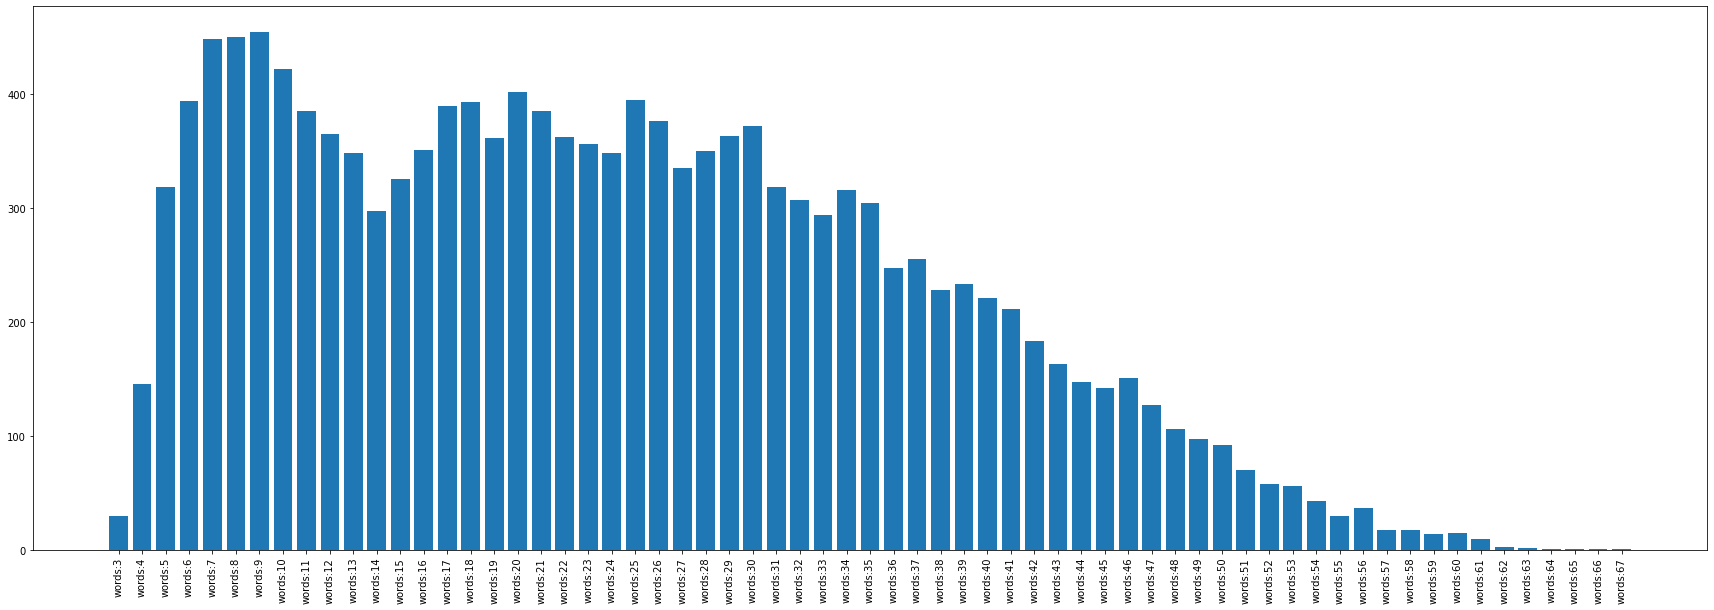

In [ ]:
t1 = pd.DataFrame(counter[['number_of_words_in_sentence','sentence']].groupby('number_of_words_in_sentence').count())
t1 = t1.reset_index()
t1['number_of_words_in_sentence'] = 'words:' + t1['number_of_words_in_sentence'].astype(str)
t1.sort_values(by = 'sentence', ascending = False)
fig = plt.figure(figsize=(30, 10))
#creating the bar plot
plt.bar(t1['number_of_words_in_sentence'], t1['sentence'])
plt.xticks(rotation=90)

In [ ]:
counter.head()

,sentence,maslow,number_of_words_in_sentence
0,Melissa never drank wine.Melissa broke up with...,physiological,18
1,The family shared a basket of fries.The son at...,physiological,21
2,Poppy started going to dance school.She knew s...,stability,26
3,Our neighbor Tracy has a boy and a girl in ele...,love,25
4,Sarah found herself easily distracted.She felt...,esteem,28


In [ ]:
counter.iloc[0][2]

18

In [ ]:
counter['number_of_sentences_in_sentence'] = 0
lis = []
for i in range(counter.shape[0]):
    lis.append(len(counter.iloc[i][0].split('.'))) # -1 for removing extra space which is also calculated as seperate sentence
counter['number_of_sentences_in_sentence'] =  lis
counter.head()

AttributeError: ignored

In [ ]:
print(counter.iloc[0][0])
print(counter.iloc[1][0])

Melissa never drank wine.Melissa broke up with her boyfriend and became depressed.She went home and tried drinking wine.
The family shared a basket of fries.The son ate them very fast.The daughter got mad.Dad told them to keep it down.


In [ ]:
counter.tail()

,sentence,maslow,number_of_words_in_sentence,number_of_sentences_in_sentence
14435,Sally and Susan were looking forward to a nigh...,physiological,19,3
14436,John sat on his porch every afternoon.One day ...,stability,43,3
14437,"As I child, I liked to dig holes.I enlisted th...",love,19,3
14438,My wife went downstairs to mail some letters.T...,stability,47,3
14439,Taylor decided to find rocks of as many differ...,esteem,26,3


In [ ]:
counter.iloc[6212][0]

'My friend decided on taking me to the Renaissance fair for some fun.I felt down for some time, so I thought this could be a pick me up.As I prepared my outfit, he came out and had clothes from the era.I looked at him as my facade fell beside me, and let out a big smile.With arms locked, and armed with smiles, we walked inside the fair.'

In [ ]:
counter.iloc[6212][:]

sentence                           My friend decided on taking me to the Renaissa...
maslow                                                                          love
number_of_words_in_sentence                                                       67
number_of_sentences_in_sentence                                                    3
Name: 6212, dtype: object

In [ ]:
len(counter.iloc[6212][0].split('.'))

6

In [ ]:
counter.shape[0]

14440

In [ ]:
print(counter.iloc[14000][0])

I just gave my cat her midday meal.


In [ ]:
counter.describe()

,number_of_words_in_sentence,number_of_sentences_in_sentence
count,14440.000000,14440.0
mean,24.144044,3.0
std,12.910981,0.0
min,3.000000,3.0
25%,13.000000,3.0
50%,23.000000,3.0
75%,33.000000,3.0
max,67.000000,3.0


## After Applying Second Filter

In [ ]:
from nltk.tokenize import sent_tokenize
from sklearn.utils import shuffle
counter = df_depressed.copy()
counter['number_of_words_in_text'] = counter.Text.apply(lambda x: len(x.split()))
counter['number_of_sentences_in_text'] = counter.Text.apply(lambda x: len(sent_tokenize(x)))
df = counter.copy()

In [ ]:
df = df[df['number_of_words_in_text']>=20]
df = df[df['number_of_words_in_text']<=200]

In [ ]:
import seaborn as sns
df = shuffle(df)
df.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,number_of_sentences_in_text
228300,352761,How to break the vicious circle of social anxi...,Hello\n\n&amp;#x200B;\n\nI have social anxiety...,How to break the vicious circle of social anxi...,depression,163,152,11,10
189519,313980,Should I just keep myself to myself?,I'm currently sitting in a bar by myself (I'm ...,Should I just keep myself to myself? I'm curre...,depression,135,128,7,4
135537,259998,Need advice. I have a friend who's suicidally ...,I have this friend whom I've known for 5 years...,Need advice. I have a friend who's suicidally ...,depression,139,122,17,7
193192,317653,"I feel so lonely after a breakup, but I'm not ...",I have been clinically depressed since about 1...,"I feel so lonely after a breakup, but I'm not ...",depression,158,142,16,8
159863,284324,Fuck this world,"Quick thing: not suicidal, just need to get my...","Fuck this world Quick thing: not suicidal, jus...",depression,197,194,3,11


In [ ]:
t1.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,number_of_sentences_in_text
228300,352761,How to break the vicious circle of social anxi...,Hello\n\n&amp;#x200B;\n\nI have social anxiety...,How to break the vicious circle of social anxi...,depression,163,152,11,sentences:10
189519,313980,Should I just keep myself to myself?,I'm currently sitting in a bar by myself (I'm ...,Should I just keep myself to myself? I'm curre...,depression,135,128,7,sentences:4
135537,259998,Need advice. I have a friend who's suicidally ...,I have this friend whom I've known for 5 years...,Need advice. I have a friend who's suicidally ...,depression,139,122,17,sentences:7
193192,317653,"I feel so lonely after a breakup, but I'm not ...",I have been clinically depressed since about 1...,"I feel so lonely after a breakup, but I'm not ...",depression,158,142,16,sentences:8
159863,284324,Fuck this world,"Quick thing: not suicidal, just need to get my...","Fuck this world Quick thing: not suicidal, jus...",depression,197,194,3,sentences:11


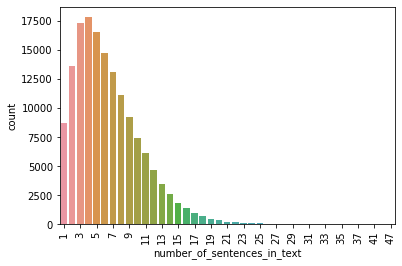

In [ ]:
t1 = df.copy()
#t1['number_of_sentences_in_text'] = 'sentences:' + t1['number_of_sentences_in_text'].astype(str)
t1.sort_values(by = 'Text', ascending = False)
ax = sns.countplot(x=t1["number_of_sentences_in_text"])
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
t1.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,number_of_sentences_in_text
228300,352761,How to break the vicious circle of social anxi...,Hello\n\n&amp;#x200B;\n\nI have social anxiety...,How to break the vicious circle of social anxi...,depression,163,152,11,10
189519,313980,Should I just keep myself to myself?,I'm currently sitting in a bar by myself (I'm ...,Should I just keep myself to myself? I'm curre...,depression,135,128,7,4
135537,259998,Need advice. I have a friend who's suicidally ...,I have this friend whom I've known for 5 years...,Need advice. I have a friend who's suicidally ...,depression,139,122,17,7
193192,317653,"I feel so lonely after a breakup, but I'm not ...",I have been clinically depressed since about 1...,"I feel so lonely after a breakup, but I'm not ...",depression,158,142,16,8
159863,284324,Fuck this world,"Quick thing: not suicidal, just need to get my...","Fuck this world Quick thing: not suicidal, jus...",depression,197,194,3,11


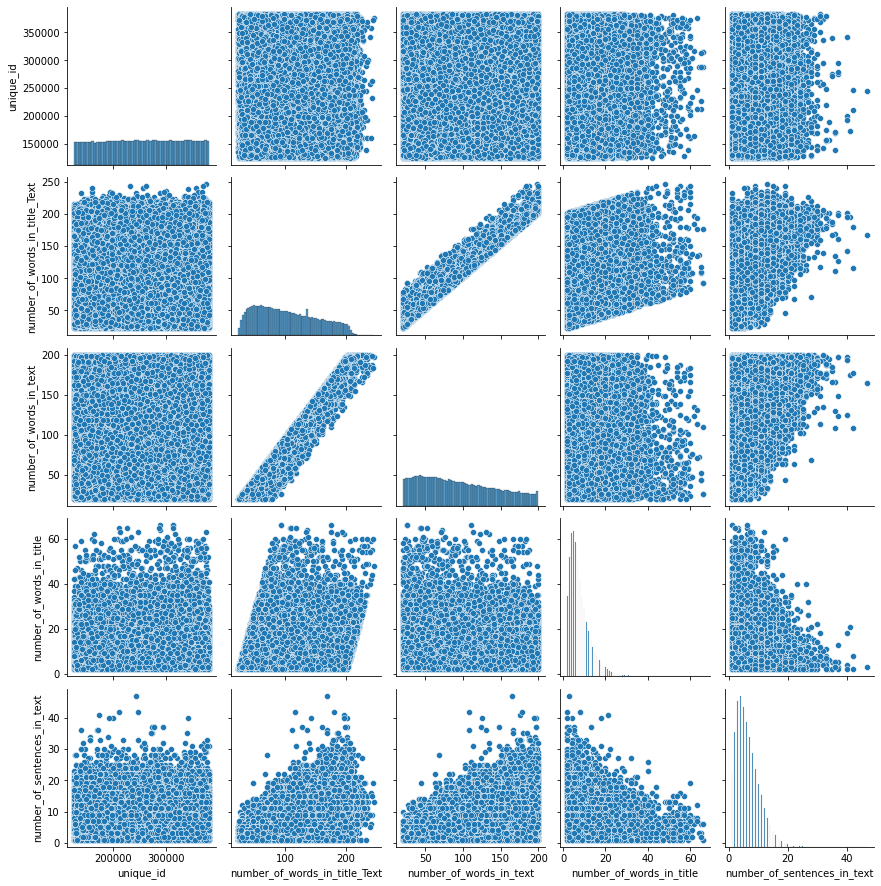

In [ ]:
sns.pairplot(t1)

In [ ]:
t1[['Text','number_of_sentences_in_text']].groupby('number_of_sentences_in_text').count()

,Text
number_of_sentences_in_text,
1,8687
2,13598
3,17297
4,17826
5,16550
6,14725
7,13066
8,11106
9,9230


In [ ]:
df.shape[0]

152748

In [ ]:
df = df[df['Text'].str.contains('depres') == False]
df.shape[0]

99843

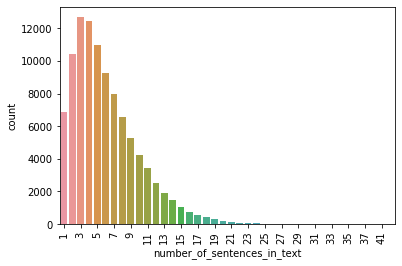

In [ ]:
counter = df.copy()
counter['number_of_words_in_text'] = counter.Text.apply(lambda x: len(x.split()))
counter['number_of_sentences_in_text'] = counter.Text.apply(lambda x: len(sent_tokenize(x)))
df = counter.copy()
t1 = df.copy()
#t1['number_of_sentences_in_text'] = 'sentences:' + t1['number_of_sentences_in_text'].astype(str)
t1.sort_values(by = 'Text', ascending = False)
ax = sns.countplot(x=t1["number_of_sentences_in_text"])
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
t1[['Text','number_of_sentences_in_text']].groupby('number_of_sentences_in_text').count()

,Text
number_of_sentences_in_text,
1,6892
2,10449
3,12684
4,12441
5,10971
6,9288
7,7941
8,6541
9,5281


# 15K Random Sampling

In [ ]:
df = df_depressed.copy()  
counter = df.copy()
stop = stopwords.words('english')
counter = counter.sort_values(by = 'number_of_words_in_text',ascending = True)
counter['Text_without_stopwords'] = counter['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
counter['nowTxt_without_sw'] = counter.Text_without_stopwords.apply(lambda x: len(x.split()))
counter['unique_words'] = counter.Text_without_stopwords.apply(lambda x: len(set(x.split())))
counter.head(10)

# DONT DO THIS HERE
#counter = counter.sort_values(by = 'unique_words',ascending = False)
#counter.reset_index(inplace = True)
#counter = counter[['Title','Text','Title_Text','Subreddit','number_of_words','Text_without_stopwords','unique_words']]
#counter.head()

,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,Text_without_stopwords,nowTxt_without_sw,unique_words
129657,254118,I was just sent away by a potential therapist....,Fucking hell.,i was just sent away by a potential therapist....,depression,45,2,43,Fucking hell.,2,2
49098,173558,There logically has to be something one can do...,any ideas?,there logically has to be something one can do...,depression,20,2,18,ideas?,1,1
123328,247789,Best part about being depressed is slowly dest...,End me,best part about being depressed is slowly dest...,depression,20,2,18,End,1,1
70034,194494,2:22 am,Dark thoughts,2:22 am dark thoughts,depression,4,2,2,Dark thoughts,2,2
149833,274294,"I seem like a healthy, functioning human, but ...",*sigh* Fuck.,"i seem like a healthy, functioning human, but ...",depression,39,2,37,*sigh* Fuck.,2,2
35817,160277,I wish I could love you.,End text.,i wish i could love you. end text.,depression,8,2,6,End text.,2,2
23428,147888,I feel like shit,Nothing new,i feel like shit nothing new,depression,6,2,4,Nothing new,2,2
25761,150221,The school system is fucked,Kill me.,the school system is fucked kill me.,depression,7,2,5,Kill me.,2,2
192263,316724,I got 7/7 task done on my to do list and showe...,Yay me!,i got 7/7 task done on my to do list and showe...,depression,19,2,17,Yay me!,2,2
3337,127797,That feel when you get a knee X ray and the do...,Gotta laugh.,that feel when you get a knee x ray and the do...,depression,22,2,20,Gotta laugh.,2,2


In [ ]:
counter = counter.iloc[0:15000][:]

In [ ]:
def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    return(df)
counter = text_preprocessing(counter,'title_text')

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
counter.shape[0]
counter = counter[['unique_id','Title','Text','title_text','Subreddit']]
df_cleaned = counter.copy()

In [ ]:
df_cleaned.drop(columns = 'Text', inplace = True)
df_cleaned.rename(columns = {'title_text':'Text'}, inplace = True)
t = df_cleaned.copy()

In [ ]:
t.head()

,unique_id,Title,Text,Subreddit
129657,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression
49098,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression
123328,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression
70034,194494,2:22 am,2:22 am dark thoughts,depression
149833,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression


In [ ]:
df_cleaned.to_csv("15KReddit.csv")

In [ ]:
train = pd.read_csv('original_train_data.csv')
test = pd.read_csv('original_test_data.csv')
test  = test[test['maslow']!='none']
train = train[train['maslow']!='none']
test  = test[['sentence','maslow']]
train = train[['sentence','maslow']]
df_train = train.copy()
df_test = test.copy()
df_train['maslow'] = train['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])
df_test['maslow'] = test['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])

In [ ]:
def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    #df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    #df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    #df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    #df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))

    return(df)

df_train = text_preprocessing(df_train,'sentence')
df_test = text_preprocessing(df_test,'sentence')

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

In [ ]:
counter = df_train.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_train = counter.copy()
df_train['maslow'] = df_train.maslow.astype('category')

counter = df_test.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_test = counter.copy()
df_test['maslow'] = df_test.maslow.astype('category')

print(df_train.maslow.unique())
encoded_dict = {'advanced_needs':0, 'basic_needs':1}
df_train['maslow'] = df_train.maslow.cat.codes
df_test['maslow'] = df_test.maslow.cat.codes
df_train.maslow

['basic_needs', 'advanced_needs']
Categories (2, object): ['advanced_needs', 'basic_needs']


0        1
2        1
3        1
4        1
5        0
        ..
16468    1
16469    1
16471    1
16472    1
16473    0
Name: maslow, Length: 14440, dtype: int8

In [ ]:
df_train.number_of_words.max()

67

In [ ]:
df_train.head()

,sentence,maslow,number_of_words
0,melissa never drank wine.melissa broke up with...,1,18
2,the family shared a basket of fries.the son at...,1,21
3,poppy started going to dance school.she knew s...,1,27
4,our neighbor tracy has a boy and a girl in ele...,1,25
5,sarah found herself easily distracted.she felt...,0,28


In [ ]:
# https://huggingface.co/docs/transformers/model_doc/roberta
# https://huggingface.co/transformers/v3.0.2/model_doc/roberta.html#transformers.RobertaConfig
data_train = df_train
data_test = df_test
print(data_train.shape)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

(14440, 3)


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
x_train

{'input_ids': <tf.Tensor: shape=(14440, 94), dtype=int32, numpy=
array([[  101,  1143,  6137, ...,     0,     0,     0],
       [  101,  1103,  1266, ...,     0,     0,     0],
       [  101,  3618,  5005, ...,     0,     0,     0],
       ...,
       [  101,  1112,   178, ...,     0,     0,     0],
       [  101,  1139,  1676, ...,     0,     0,     0],
       [  101, 27629,  7777, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(14440, 94), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
x_test

{'input_ids': <tf.Tensor: shape=(3610, 90), dtype=int32, numpy=
array([[  101, 17462,  1905, ...,     0,     0,     0],
       [  101,  1105,  1183, ...,     0,     0,     0],
       [  101, 24181, 17670, ...,     0,     0,     0],
       ...,
       [  101, 13962,  1767, ...,     0,     0,     0],
       [  101,   182,  1766, ...,     0,     0,     0],
       [  101,   179, 11806, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3610, 90), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
max_len = None
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.5)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(2, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

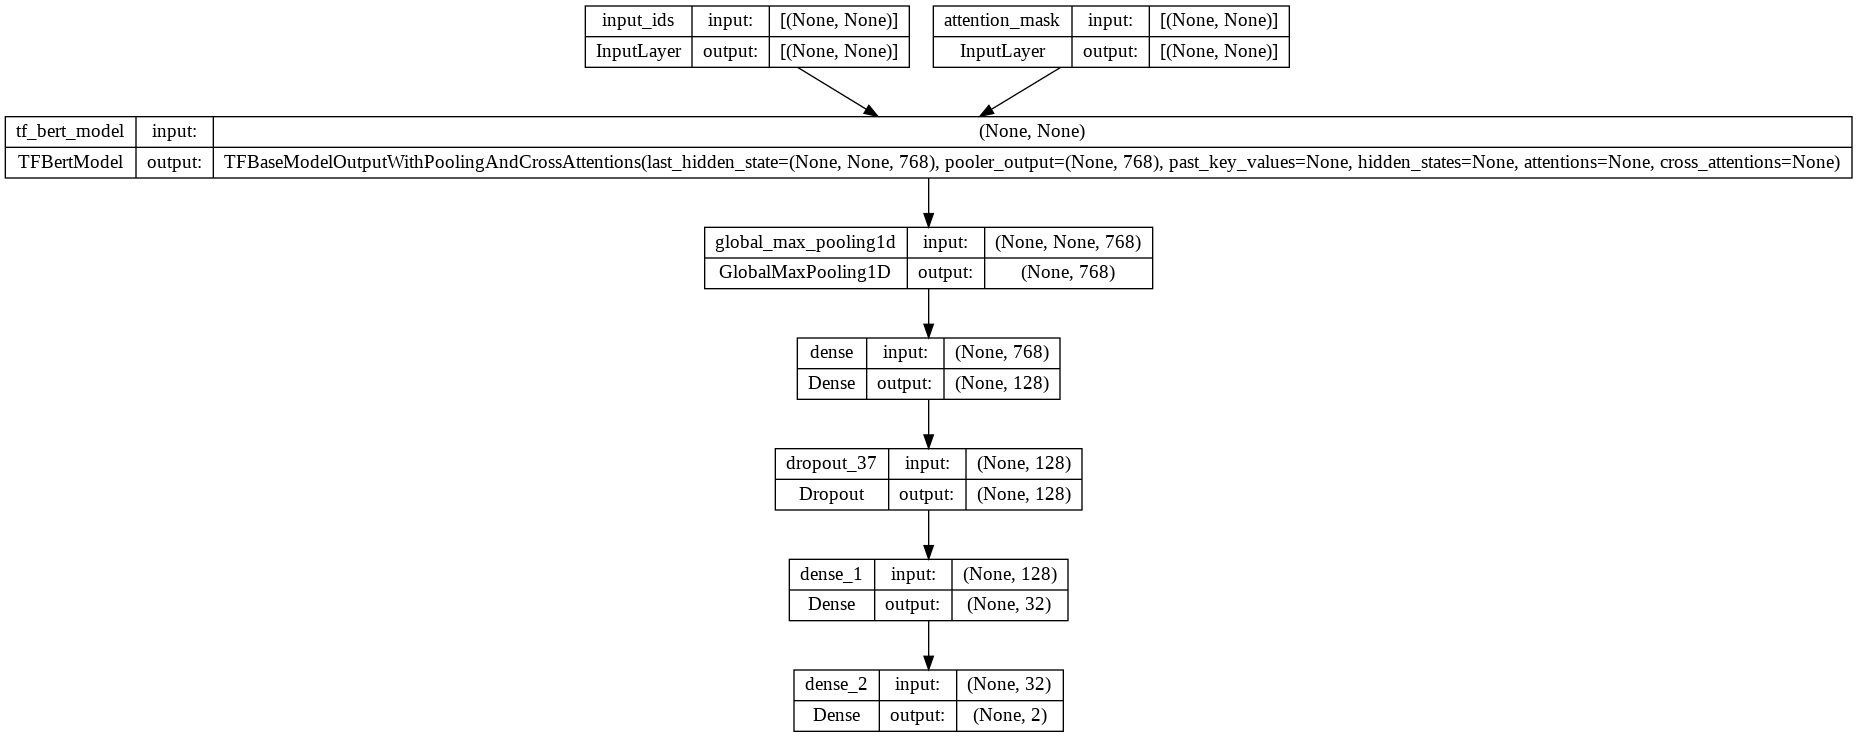

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)
#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [ ]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        checkpoint_filepath = '/tmp/checkpoint'
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='val_balanced_accuracy',
            mode='max',
            save_best_only=True)

        callback = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0,
            patience=5,
            verbose=0,
            mode='auto',
            baseline=None,
            restore_best_weights=False,
        )
        train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            callbacks=[model_checkpoint_callback,callback]
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


402/402 [==============================] - 328s 763ms/step - loss: 0.5732 - balanced_accuracy: 0.7114 - val_loss: 0.4936 - val_balanced_accuracy: 0.7651
Epoch 2/5
402/402 [==============================] - 311s 773ms/step - loss: 0.4756 - balanced_accuracy: 0.7822 - val_loss: 0.4896 - val_balanced_accuracy: 0.7659
Epoch 3/5
402/402 [==============================] - 311s 773ms/step - loss: 0.4222 - balanced_accuracy: 0.8112 - val_loss: 0.5056 - val_balanced_accuracy: 0.7673
Epoch 4/5
402/402 [==============================] - 305s 758ms/step - loss: 0.3789 - balanced_accuracy: 0.8346 - val_loss: 0.5300 - val_balanced_accuracy: 0.7573
Epoch 5/5
402/402 [==============================] - 305s 759ms/step - loss: 0.3451 - balanced_accuracy: 0.8470 - val_loss: 0.5808 - val_balanced_accuracy: 0.7582
Do you want to run another epoch?1/0: 0


In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

113/113 [==============================] - 25s 197ms/step


array([0.26928872, 0.6520083 ], dtype=float32)

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1)

In [ ]:
from sklearn.metrics import classification_report 
t = ['basic_needs', 'advanced_needs']
print(classification_report(data_test.maslow, y_predicted,target_names = t))

In [ ]:
model.save('bert_base_cased_basic_advanced_classifier.h5') 

In [ ]:
df_cleaned.head()

,unique_id,Title,Text,Subreddit
129657,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression
49098,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression
123328,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression
70034,194494,2:22 am,2:22 am dark thoughts,depression
149833,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression


In [ ]:
data_test = df_cleaned
x_test = tokenizer(
    text = data_test.Text.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [ ]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

469/469 [==============================] - 299s 631ms/step


array([0.42523894, 0.5461462 ], dtype=float32)

In [ ]:
predicted_raw[0][0]

0.42523894

In [ ]:
category = ['basic_needs','advanced_needs']

In [ ]:
for i in category:
    df_cleaned[i] = 0

lis_basic_needs = []
lis_advanced_needs = []

for i in range(len(predicted_raw)):
    lis_basic_needs.append(predicted_raw[i][0])
    lis_advanced_needs.append(predicted_raw[i][1])

df_cleaned['basic_needs'] = lis_basic_needs
df_cleaned['advanced_needs'] = lis_advanced_needs
df_cleaned.head()

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs
129657,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression,advanced_needs,0.425239,0.546146
49098,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression,basic_needs,0.620311,0.211792
123328,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression,basic_needs,0.468869,0.423367
70034,194494,2:22 am,2:22 am dark thoughts,depression,advanced_needs,0.305860,0.780393
149833,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression,advanced_needs,0.417766,0.501001


In [ ]:
df_cleaned

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs
129657,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression,advanced_needs,0.425239,0.546146
49098,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression,basic_needs,0.620311,0.211792
123328,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression,basic_needs,0.468869,0.423367
70034,194494,2:22 am,2:22 am dark thoughts,depression,advanced_needs,0.305860,0.780393
149833,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression,advanced_needs,0.417766,0.501001
...,...,...,...,...,...,...,...
69246,193706,Just lonely.,"just lonely. i have no friends, i do not even ...",depression,advanced_needs,0.281950,0.625932
14264,138724,It's almost springtime...,it is almost springtime... the commercial brea...,depression,advanced_needs,0.366717,0.485911
86531,210991,Video games don't feel like fun anymore,video games do not feel like fun anymore it is...,depression,basic_needs,0.495854,0.346933
169947,294408,I need to cry...,i need to cry... does anybody else feel like t...,depression,basic_needs,0.530509,0.404714


In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1)
df_cleaned['final_prediction'] = y_predicted
df_cleaned['final_prediction'] = df_cleaned['final_prediction'].replace([1,0],['advanced_needs','basic_needs'])
df_cleaned.head()

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs
129657,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression,advanced_needs,0.425239,0.546146
49098,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression,basic_needs,0.620311,0.211792
123328,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression,basic_needs,0.468869,0.423367
70034,194494,2:22 am,2:22 am dark thoughts,depression,advanced_needs,0.305860,0.780393
149833,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression,advanced_needs,0.417766,0.501001


In [ ]:
df_cleaned[['Text','final_prediction']].groupby(['final_prediction']).count()

,Text
final_prediction,
advanced_needs,8004
basic_needs,6996


In [ ]:
def get_predictions(df_cleaned,subreddit_type,final_prediction):
    g = df_cleaned[df_cleaned['Subreddit'] == subreddit_type]
    g = g[g['final_prediction'] == final_prediction]
    for i in range(0,10):
        print(g.iloc[i][1]) 

print("Advanced Needs:")
get_predictions(df_cleaned,'depression','advanced_needs')
print("---------------------------------------------------------------------------------------------")
print("Basic Needs:")
get_predictions(df_cleaned,'depression','basic_needs')

Advanced Needs:
I was just sent away by a potential therapist. Two months ago I had an intake with them and today I had a meeting to talk about the results. Apparently my case is a special kind of severe and they can't help me.
2:22 am
I seem like a healthy, functioning human, but I deeply, profoundly hate myself and want to die. I opened up to my wife, and regret it because now she's depressed and I hate myself even more now.
I wish I could love you.
I feel like shit
I got 7/7 task done on my to do list and showered and brushed my teeth today!
That feel when you get a knee X ray and the doc confirms the pain is from sleeping too long...
I have no friends and it's so, so lonely.
Roll on death
I have never wanted to kill myself more than right now
---------------------------------------------------------------------------------------------
Basic Needs:
There logically has to be something one can do in order to make the world a better place.
Best part about being depressed is slowly dest

In [ ]:
from google.colab import files

df_cleaned.to_csv('reddit_predictions_basic_advanced.csv')
files.download('reddit_predictions_basic_advanced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training and Getting Predictions For Maslow Needs

In [ ]:
df_cleaned = pd.read_csv('15KReddit.csv')
df_cleaned = df_cleaned[['unique_id','Title','Text','Subreddit','final_prediction','basic_needs','advanced_needs']]
df_cleaned.head()

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs
0,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression,advanced_needs,0.425239,0.546146
1,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression,basic_needs,0.620311,0.211792
2,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression,basic_needs,0.468869,0.423367
3,194494,2:22 am,2:22 am dark thoughts,depression,advanced_needs,0.305860,0.780393
4,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression,advanced_needs,0.417766,0.501001


In [ ]:
df = pd.read_csv('reddit_predictions_basic_advanced.csv')
df = df[['unique_id','Title','Text','Subreddit','final_prediction','basic_needs','advanced_needs']]
df.head()

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs
0,254118,I was just sent away by a potential therapist....,i was just sent away by a potential therapist....,depression,advanced_needs,0.425239,0.546146
1,173558,There logically has to be something one can do...,there logically has to be something one can do...,depression,basic_needs,0.620311,0.211792
2,247789,Best part about being depressed is slowly dest...,best part about being depressed is slowly dest...,depression,basic_needs,0.468869,0.423367
3,194494,2:22 am,2:22 am dark thoughts,depression,advanced_needs,0.305860,0.780393
4,274294,"I seem like a healthy, functioning human, but ...","i seem like a healthy, functioning human, but ...",depression,advanced_needs,0.417766,0.501001


In [ ]:
df_advanced_needs = df[df['final_prediction']=='advanced_needs']
df_basic_needs = df[df['final_prediction'] == 'basic_needs']
df_advanced_needs[['Text','Subreddit']].groupby('Subreddit').count()

,Text
Subreddit,
depression,8004


In [ ]:
counter = df_basic_needs.copy()
counter['number_of_words'] = counter.Text.apply(lambda x: len(x.split()))
counter = counter.sort_values(by = 'number_of_words',ascending = True)
df_basic_needs = counter.copy()

counter = df_advanced_needs.copy()
counter['number_of_words'] = counter.Text.apply(lambda x: len(x.split()))
counter = counter.sort_values(by = 'number_of_words',ascending = True)
df_advanced_needs = counter.copy()
counter.head(10)

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs,number_of_words
68,211219,Oh boy,oh boy oh boy \n\n,depression,advanced_needs,0.455305,0.516062,4
3,194494,2:22 am,2:22 am dark thoughts,depression,advanced_needs,0.305860,0.780393,4
224,216287,Kill me,kill me save me,depression,advanced_needs,0.437211,0.558291,4
33,294977,Im lonely,im lonely hello everyone:),depression,advanced_needs,0.153446,0.768005,4
32,356848,The cure,the cure instagram: mister.charlesgecko,depression,advanced_needs,0.234536,0.776288,4
163,253206,Zero support,zero support anyone there,depression,advanced_needs,0.403480,0.572549,4
218,250573,Bad day,bad day every day,depression,advanced_needs,0.489254,0.503896,4
235,196434,I'm lonely,i am lonely it hurts.,depression,advanced_needs,0.292242,0.645637,5
50,187688,Shooting myself tonight,shooting myself tonight boom headshot,depression,advanced_needs,0.472950,0.492104,5
365,293695,Fuck everybody.,fuck everybody. somebody help me,depression,advanced_needs,0.324156,0.605031,5


In [ ]:
df_basic_needs[['Text','number_of_words']].groupby('number_of_words').count()

,Text
number_of_words,
4,3
5,13
6,26
7,46
8,72
...,...
72,3
73,1
74,1


In [ ]:
df_advanced_needs[['Text','number_of_words']].groupby('number_of_words').count()

,Text
number_of_words,
4,7
5,16
6,45
7,67
8,95
...,...
73,1
75,2
76,1


In [ ]:
train = pd.read_csv('original_train_data.csv')
test = pd.read_csv('original_test_data.csv')
test  = test[test['maslow']!='none']
train = train[train['maslow']!='none']
test  = test[['sentence','maslow']]
train = train[['sentence','maslow']]
df_train = train.copy()
df_train_advanced = df_train.loc[(df_train['maslow'] == 'esteem') | (df_train['maslow'] == 'spiritual growth')]
df_train_basic = df_train.loc[(df_train['maslow'] != 'esteem') & (df_train['maslow'] != 'spiritual growth')]
df_test = test.copy()
df_test_advanced = df_test.loc[(df_test['maslow'] == 'esteem') | (df_test['maslow'] == 'spiritual growth')]
df_test_basic = df_test.loc[(df_test['maslow'] != 'esteem') & (df_test['maslow'] != 'spiritual growth')]

In [ ]:
df_train_basic

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,physiological
2,The family shared a basket of fries.The son at...,physiological
3,Poppy started going to dance school.She knew s...,stability
4,Our neighbor Tracy has a boy and a girl in ele...,love
6,Jesse wanted to live debt free.He still owed a...,stability
...,...,...
16467,I got a new neighbor.She seemed friendly.She s...,love
16468,Sally and Susan were looking forward to a nigh...,physiological
16469,John sat on his porch every afternoon.One day ...,stability
16471,"As I child, I liked to dig holes.I enlisted th...",love


In [ ]:
df_train_advanced.maslow.unique()

array(['esteem', 'spiritual growth'], dtype=object)

In [ ]:
df_train_basic.maslow.unique()

array(['physiological', 'stability', 'love'], dtype=object)

In [ ]:
df_test_advanced.shape[0]

1510

In [ ]:
df_train_basic.shape[0]

8403

In [ ]:
df_train_advanced.shape[0]

6037

In [ ]:
df_test_basic.shape[0]

2100

In [ ]:
def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    return(df)
df_train_advanced = text_preprocessing(df_train_advanced,'sentence')
df_test_advanced = text_preprocessing(df_test_advanced,'sentence') 
df_train_basic = text_preprocessing(df_train_basic,'sentence')
df_test_basic = text_preprocessing(df_test_basic,'sentence')

  0%|          | 0/6037 [00:00<?, ?it/s]

  0%|          | 0/6037 [00:00<?, ?it/s]

  0%|          | 0/1510 [00:00<?, ?it/s]

  0%|          | 0/1510 [00:00<?, ?it/s]

  0%|          | 0/8403 [00:00<?, ?it/s]

  0%|          | 0/8403 [00:00<?, ?it/s]

  0%|          | 0/2100 [00:00<?, ?it/s]

  0%|          | 0/2100 [00:00<?, ?it/s]

In [ ]:
df_train_basic.head(10)

,sentence,maslow
0,melissa never drank wine.melissa broke up with...,physiological
2,the family shared a basket of fries.the son at...,physiological
3,poppy started going to dance school.she knew s...,stability
4,our neighbor tracy has a boy and a girl in ele...,love
6,jesse wanted to live debt free.he still owed a...,stability
8,adam and his girlfriend have been together for...,love
9,i got a great recipe for chicken off the inter...,physiological
14,i did not want to play a song.my stepmom had a...,love
15,i just want today to be a restful day.,physiological
16,luise went to the bakery to buy a baguette.upo...,stability


In [ ]:
df_train_advanced.head(10)

,sentence,maslow
5,sarah found herself easily distracted.she felt...,esteem
7,tim was at the pool with his friends.they were...,spiritual growth
10,joey's parents never talked about money in fro...,esteem
11,fritz was a car salesman.he worked 9-5 every d...,spiritual growth
12,mary had been feeling depressed lately.she dec...,esteem
13,tina was working as a maid.she hated her job.,esteem
23,joey decides he would like to learn how to dan...,spiritual growth
24,"judy loved to play tennis.however, she needed ...",spiritual growth
25,sally just got a brand new car.she wanted to c...,esteem
26,tom was driving home from work.he was arguing ...,esteem


In [ ]:
counter = df_train_advanced.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_train_advanced = counter.copy()
df_train_advanced['maslow'] = df_train_advanced.maslow.astype('category')

counter = df_test_advanced.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_test_advanced = counter.copy()
df_test_advanced['maslow'] = df_test_advanced.maslow.astype('category')

counter = df_train_basic.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_train_basic = counter.copy()
df_train_basic['maslow'] = df_train_basic.maslow.astype('category')

counter = df_test_basic.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_test_basic = counter.copy()
df_test_basic['maslow'] = df_test_basic.maslow.astype('category')

print(df_train_basic.maslow.unique())
print(df_train_advanced.maslow.unique())
df_train_advanced['maslow'] = df_train_advanced.maslow.cat.codes
df_test_advanced['maslow'] = df_test_advanced.maslow.cat.codes
df_train_basic['maslow'] = df_train_basic.maslow.cat.codes
df_test_basic['maslow'] = df_test_basic.maslow.cat.codes
df_train_basic.maslow

['physiological', 'stability', 'love']
Categories (3, object): ['love', 'physiological', 'stability']
['esteem', 'spiritual growth']
Categories (2, object): ['esteem', 'spiritual growth']


0        1
2        1
3        2
4        0
6        2
        ..
16467    0
16468    1
16469    2
16471    0
16472    2
Name: maslow, Length: 8403, dtype: int8

In [ ]:
df_train_basic.head(10)

,sentence,maslow,number_of_words
0,melissa never drank wine.melissa broke up with...,1,18
2,the family shared a basket of fries.the son at...,1,21
3,poppy started going to dance school.she knew s...,2,27
4,our neighbor tracy has a boy and a girl in ele...,0,25
6,jesse wanted to live debt free.he still owed a...,2,21
8,adam and his girlfriend have been together for...,0,10
9,i got a great recipe for chicken off the inter...,1,19
14,i did not want to play a song.my stepmom had a...,0,32
15,i just want today to be a restful day.,1,9
16,luise went to the bakery to buy a baguette.upo...,2,23


In [ ]:
df_train_advanced.head(10)

,sentence,maslow,number_of_words
5,sarah found herself easily distracted.she felt...,0,28
7,tim was at the pool with his friends.they were...,1,32
10,joey's parents never talked about money in fro...,0,38
11,fritz was a car salesman.he worked 9-5 every d...,1,21
12,mary had been feeling depressed lately.she dec...,0,20
13,tina was working as a maid.she hated her job.,0,9
23,joey decides he would like to learn how to dan...,1,27
24,"judy loved to play tennis.however, she needed ...",1,16
25,sally just got a brand new car.she wanted to c...,0,28
26,tom was driving home from work.he was arguing ...,0,27


In [ ]:
df_train.head()

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,physiological
2,The family shared a basket of fries.The son at...,physiological
3,Poppy started going to dance school.She knew s...,stability
4,Our neighbor Tracy has a boy and a girl in ele...,love
5,Sarah found herself easily distracted.She felt...,esteem


In [ ]:
df_train_basic.number_of_words.max()

67

In [ ]:
df_train_advanced.number_of_words.max()

65

In [ ]:
df_train_basic.head()

,sentence,maslow,number_of_words
0,melissa never drank wine.melissa broke up with...,1,18
2,the family shared a basket of fries.the son at...,1,21
3,poppy started going to dance school.she knew s...,2,27
4,our neighbor tracy has a boy and a girl in ele...,0,25
6,jesse wanted to live debt free.he still owed a...,2,21


In [ ]:
data_train = df_train_basic
data_test = df_test_basic
print(data_train.shape)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

(8403, 3)


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
x_train

{'input_ids': <tf.Tensor: shape=(8403, 94), dtype=int32, numpy=
array([[  101,  1143,  6137, ...,     0,     0,     0],
       [  101,  1103,  1266, ...,     0,     0,     0],
       [  101,  3618,  5005, ...,     0,     0,     0],
       ...,
       [  101,   179, 10559, ...,     0,     0,     0],
       [  101,  1112,   178, ...,     0,     0,     0],
       [  101,  1139,  1676, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(8403, 94), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
x_test

{'input_ids': <tf.Tensor: shape=(2100, 90), dtype=int32, numpy=
array([[  101,  1105,  1183, ...,     0,     0,     0],
       [  101, 24181, 17670, ...,     0,     0,     0],
       [  101,   178,  1108, ...,     0,     0,     0],
       ...,
       [  101,  2393,  7614, ...,     0,     0,     0],
       [  101,   182,  1766, ...,     0,     0,     0],
       [  101,   179, 11806, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2100, 90), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
max_len = None
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(3, activation = 'sigmoid')(out)
model_basic = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model_basic.layers[2].trainable = True

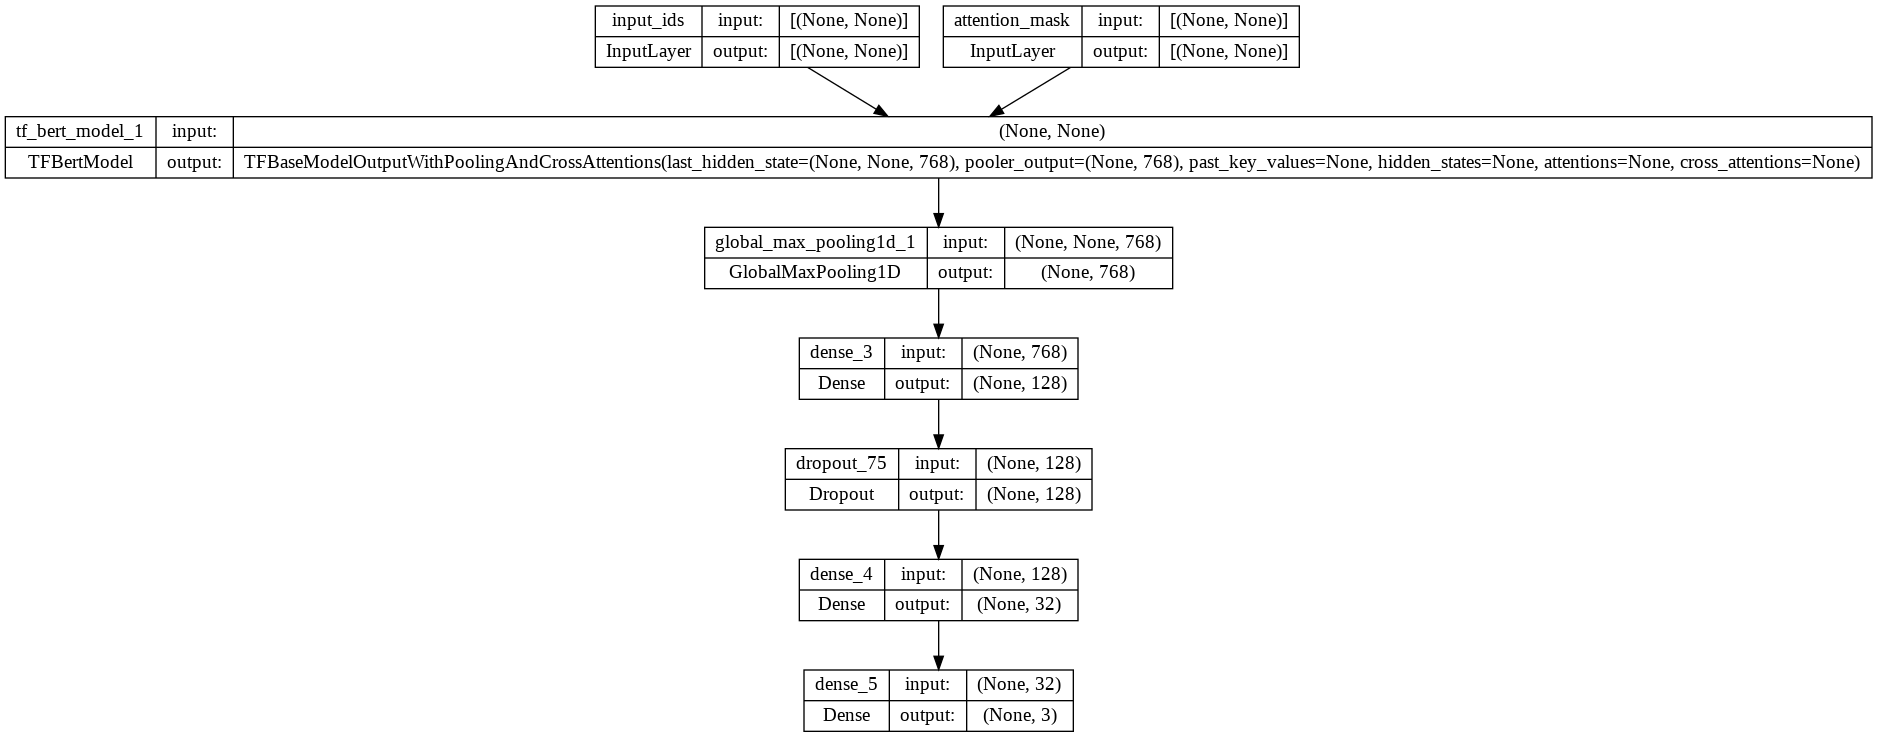

In [ ]:
model_basic.layers
tf.keras.utils.plot_model(model_basic, show_shapes = True)

In [ ]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)
#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model_basic.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [ ]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        checkpoint_filepath = '/tmp/checkpoint'
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='val_balanced_accuracy',
            mode='max',
            save_best_only=True)

        callback = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0,
            patience=5,
            verbose=0,
            mode='auto',
            baseline=None,
            restore_best_weights=False,
        )
        train_history = model_basic.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            callbacks=[model_checkpoint_callback,callback]
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


234/234 [==============================] - 212s 814ms/step - loss: 0.6507 - balanced_accuracy: 0.7310 - val_loss: 0.5524 - val_balanced_accuracy: 0.7762
Epoch 2/5
234/234 [==============================] - 188s 802ms/step - loss: 0.4330 - balanced_accuracy: 0.8365 - val_loss: 0.5474 - val_balanced_accuracy: 0.7800
Epoch 3/5
234/234 [==============================] - 182s 777ms/step - loss: 0.3297 - balanced_accuracy: 0.8777 - val_loss: 0.5909 - val_balanced_accuracy: 0.7776
Epoch 4/5
234/234 [==============================] - 182s 776ms/step - loss: 0.2599 - balanced_accuracy: 0.9069 - val_loss: 0.6163 - val_balanced_accuracy: 0.7786
Epoch 5/5
234/234 [==============================] - 182s 778ms/step - loss: 0.2125 - balanced_accuracy: 0.9285 - val_loss: 0.6622 - val_balanced_accuracy: 0.7771
Do you want to run another epoch?1/0: 0


In [ ]:
model_basic.load_weights(checkpoint_filepath)

In [ ]:
predicted_raw_basic = model_basic.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw_basic[0]

1/1 [==============================] - 4s 4s/step


array([0.6434002 , 0.8441571 , 0.52843755], dtype=float32)

In [ ]:
model_basic.save('bert_base_cased_basic_maslow_3_classifier.h5') 

In [ ]:
y_predicted_basic = np.argmax(predicted_raw_basic, axis = 1)

In [ ]:
y_predicted_basic

array([1, 1, 0, 0, 2, 2, 2, 0, 1, 2])

In [ ]:
from sklearn.metrics import classification_report 
t = ['love', 'physiological', 'stability']
print(classification_report(data_test.maslow, y_predicted_basic,target_names = t))

               precision    recall  f1-score   support

         love       0.83      0.81      0.82       900
physiological       0.75      0.67      0.71       455
    stability       0.74      0.81      0.77       745

     accuracy                           0.78      2100
    macro avg       0.77      0.76      0.77      2100
 weighted avg       0.78      0.78      0.78      2100



In [ ]:
y_predicted = np.argmax(predicted_raw_basic, axis = 1)

In [ ]:
data_train = df_train_advanced
data_test = df_train_advanced
print(data_train.shape)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

max_len = 70
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(2, activation = 'sigmoid')(out)
model_advanced = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model_advanced.layers[2].trainable = True

optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)
#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model_advanced.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

# Model is overfitting too much if included callbacks
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        checkpoint_filepath = '/tmp/checkpoint'
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='val_balanced_accuracy',
            mode='max',
            save_best_only=True)

        callback = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0,
            patience=5,
            verbose=0,
            mode='auto',
            baseline=None,
            restore_best_weights=False,
        )
        train_history = model_advanced.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            callbacks=[model_checkpoint_callback,callback]
                            )
    else:
        break

(6037, 3)


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Do you want to run another epoch?1/0: 1
Epoch 1/5


168/168 [==============================] - 153s 764ms/step - loss: 0.5253 - balanced_accuracy: 0.7373 - val_loss: 0.3819 - val_balanced_accuracy: 0.8261
Epoch 2/5
168/168 [==============================] - 126s 749ms/step - loss: 0.4002 - balanced_accuracy: 0.8191 - val_loss: 0.2763 - val_balanced_accuracy: 0.8840
Epoch 3/5
168/168 [==============================] - 126s 753ms/step - loss: 0.3153 - balanced_accuracy: 0.8645 - val_loss: 0.2101 - val_balanced_accuracy: 0.9255
Epoch 4/5
168/168 [==============================] - 125s 745ms/step - loss: 0.2499 - balanced_accuracy: 0.8955 - val_loss: 0.1472 - val_balanced_accuracy: 0.9513
Epoch 5/5
168/168 [==============================] - 125s 746ms/step - loss: 0.1933 - balanced_accuracy: 0.9212 - val_loss: 0.1061 - val_balanced_accuracy: 0.9636
Do you want to run another epoch?1/0: 0


In [ ]:
model_advanced.load_weights(checkpoint_filepath)

predicted_raw_advanced = model_advanced.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw_advanced[0]

y_predicted_advanced = np.argmax(predicted_raw_advanced, axis = 1)

from sklearn.metrics import classification_report 
t = ['esteem', 'spiritual growth']
print(classification_report(data_test.maslow, y_predicted_advanced,target_names = t))

189/189 [==============================] - 33s 161ms/step
                  precision    recall  f1-score   support

          esteem       0.98      0.96      0.97      4149
spiritual growth       0.92      0.96      0.94      1888

        accuracy                           0.96      6037
       macro avg       0.95      0.96      0.96      6037
    weighted avg       0.96      0.96      0.96      6037



In [ ]:
model_advanced.save('bert_base_cased_advanced_maslow_2_classifier.h5') 

In [ ]:
df_basic_needs.head()

,unique_id,Title,Text,Subreddit,final_prediction,basic_needs,advanced_needs,number_of_words
47,137915,Bad Day,bad day anyone else?,depression,basic_needs,0.508259,0.448389,4
75,224123,dn isosdnfnjdosk,dn isosdnfnjdosk hsndjeicoodkdjebbfkxoxlxndbnz...,depression,basic_needs,0.563547,0.415276,4
55,183837,Im done,im done almost time,depression,basic_needs,0.635420,0.285715,4
123,148907,On being selfish,on being selfish i am.,depression,basic_needs,0.606441,0.359398,5
65,181011,Day 4...,day 4... i am done...,depression,basic_needs,0.587673,0.322085,5


In [ ]:
t_basic = df_basic_needs
t_advanced = df_advanced_needs
t_basic = shuffle(t_basic)
t_advanced = shuffle(t_advanced)
t_basic.reset_index(inplace = True)
t_advanced.reset_index(inplace = True)
t_basic = t_basic[['Title','Text','Subreddit','basic_needs','final_prediction']]
t_advanced = t_advanced[['Title','Text','Subreddit','advanced_needs','final_prediction']]
t_basic.head()

,Title,Text,Subreddit,basic_needs,final_prediction
0,Does anyone know of any basic general CBT base...,does anyone know of any basic general cbt base...,depression,0.652168,basic_needs
1,I could give fuck all for how much karma I get...,i could give fuck all for how much karma i get...,depression,0.497244,basic_needs
2,Every time I think I have this disorder figure...,every time i think i have this disorder figure...,depression,0.625792,basic_needs
3,guess today is the day ):,guess today is the day ): done nothing matters...,depression,0.556909,basic_needs
4,Why do I hate myself so much,why do i hate myself so much and how do i stop,depression,0.555328,basic_needs


In [ ]:
t_advanced.head()

,Title,Text,Subreddit,advanced_needs,final_prediction
0,Im just wating to die,im just wating to die my friends want me to go...,depression,0.515670,advanced_needs
1,new friends?,new friends? anyone down to talk that is been ...,depression,0.756389,advanced_needs
2,"People always forget about mt, my 'friends' ab...","people always forget about mt, my 'friends' ab...",depression,0.552250,advanced_needs
3,Anyone have low vitamin D?,anyone have low vitamin d? do you think vitami...,depression,0.579985,advanced_needs
4,Depression is bad enough...,depression is bad enough... but to also have t...,depression,0.512758,advanced_needs


In [ ]:
df_cleaned_basic = t_basic.copy()
df_cleaned_advanced = t_advanced.copy()
df_cleaned_advanced.head()

,Title,Text,Subreddit,advanced_needs,final_prediction
0,Im just wating to die,im just wating to die my friends want me to go...,depression,0.515670,advanced_needs
1,new friends?,new friends? anyone down to talk that is been ...,depression,0.756389,advanced_needs
2,"People always forget about mt, my 'friends' ab...","people always forget about mt, my 'friends' ab...",depression,0.552250,advanced_needs
3,Anyone have low vitamin D?,anyone have low vitamin d? do you think vitami...,depression,0.579985,advanced_needs
4,Depression is bad enough...,depression is bad enough... but to also have t...,depression,0.512758,advanced_needs


In [ ]:
df_cleaned_basic.shape[0]

6996

In [ ]:
df_cleaned_advanced.shape[0]

8004

In [ ]:
data_test = df_cleaned_basic
x_test = tokenizer(
    text = data_test.Text.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
predicted_raw_basic = model_basic.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw_basic[0]

219/219 [==============================] - 36s 166ms/step


array([0.5861368 , 0.44013247, 0.79871166], dtype=float32)

In [ ]:
data_test = df_cleaned_advanced
x_test = tokenizer(
    text = data_test.Text.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
predicted_raw_advanced = model_advanced.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw_advanced[0]

251/251 [==============================] - 43s 170ms/step


array([0.28963768, 0.19384044], dtype=float32)

In [ ]:
category_basic = ['love', 'physiological', 'stability']
caetgory_advanced = ['esteem', 'spiritual growth']

In [ ]:
for i in category_basic:
    df_cleaned_basic[i] = 0

lis_love = []
lis_physiological = []
lis_stability = []

for i in range(len(predicted_raw_basic)):
    lis_love.append(predicted_raw_basic[i][0])
    lis_physiological.append(predicted_raw_basic[i][1])
    lis_stability.append(predicted_raw_basic[i][2])

df_cleaned_basic['love'] = lis_love
df_cleaned_basic['physiological'] = lis_physiological
df_cleaned_basic['stability'] = lis_stability
df_cleaned_basic.head(2)

,Title,Text,Subreddit,basic_needs,final_prediction,love,physiological,stability
0,Does anyone know of any basic general CBT base...,does anyone know of any basic general cbt base...,depression,0.652168,basic_needs,0.586137,0.440132,0.798712
1,I could give fuck all for how much karma I get...,i could give fuck all for how much karma i get...,depression,0.497244,basic_needs,0.709785,0.335064,0.783461


In [ ]:
for i in caetgory_advanced:
    df_cleaned_advanced[i] = 0

lis_esteem = []
lis_spiritual_growth = []

for i in range(len(predicted_raw_advanced)):
    lis_esteem.append(predicted_raw_advanced[i][0])
    lis_spiritual_growth.append(predicted_raw_advanced[i][1])

df_cleaned_advanced['esteem'] = lis_esteem
df_cleaned_advanced['spiritual_growth'] = lis_spiritual_growth
df_cleaned_advanced = df_cleaned_advanced[['Title','Text','Subreddit','advanced_needs','final_prediction','esteem','spiritual_growth']]
df_cleaned_advanced.head(2)

,Title,Text,Subreddit,advanced_needs,final_prediction,esteem,spiritual_growth
0,Im just wating to die,im just wating to die my friends want me to go...,depression,0.515670,advanced_needs,0.289638,0.193840
1,new friends?,new friends? anyone down to talk that is been ...,depression,0.756389,advanced_needs,0.258672,0.076594


In [ ]:
y_predicted = np.argmax(predicted_raw_advanced, axis = 1)
df_cleaned_advanced['final_prediction_maslow'] = y_predicted
df_cleaned_advanced['final_prediction_maslow'] = df_cleaned_advanced['final_prediction_maslow'].replace([0,1],['esteem','spiritual growth'])
df_cleaned_advanced = df_cleaned_advanced[['Title','Text','Subreddit','final_prediction','final_prediction_maslow','advanced_needs','esteem','spiritual_growth']]
df_cleaned_advanced['love'] = 0
df_cleaned_advanced['physiological'] = 0
df_cleaned_advanced['stability'] = 0
df_cleaned_advanced.head(2)

,Title,Text,Subreddit,final_prediction,final_prediction_maslow,advanced_needs,esteem,spiritual_growth,love,physiological,stability
0,Im just wating to die,im just wating to die my friends want me to go...,depression,advanced_needs,esteem,0.515670,0.289638,0.193840,0,0,0
1,new friends?,new friends? anyone down to talk that is been ...,depression,advanced_needs,esteem,0.756389,0.258672,0.076594,0,0,0


In [ ]:
y_predicted = np.argmax(predicted_raw_basic, axis = 1)
df_cleaned_basic['final_prediction_maslow'] = y_predicted
df_cleaned_basic['final_prediction_maslow'] = df_cleaned_basic['final_prediction_maslow'].replace([0,1,2],['love', 'physiological', 'stability'])
df_cleaned_basic = df_cleaned_basic[['Title','Text','Subreddit','final_prediction','final_prediction_maslow','basic_needs','love', 'physiological', 'stability']]
df_cleaned_basic['esteem'] = 0
df_cleaned_basic['spiritual_growth'] = 0
df_cleaned_basic.head(2)

,Title,Text,Subreddit,final_prediction,final_prediction_maslow,basic_needs,love,physiological,stability,esteem,spiritual_growth
0,Does anyone know of any basic general CBT base...,does anyone know of any basic general cbt base...,depression,basic_needs,stability,0.652168,0.586137,0.440132,0.798712,0,0
1,I could give fuck all for how much karma I get...,i could give fuck all for how much karma i get...,depression,basic_needs,stability,0.497244,0.709785,0.335064,0.783461,0,0


In [ ]:
df_cleaned = pd.concat((df_cleaned_basic,df_cleaned_advanced))
df_cleaned.head()

,Title,Text,Subreddit,final_prediction,final_prediction_maslow,basic_needs,love,physiological,stability,esteem,spiritual_growth,advanced_needs
0,Does anyone know of any basic general CBT base...,does anyone know of any basic general cbt base...,depression,basic_needs,stability,0.652168,0.586137,0.440132,0.798712,0.0,0.0,NaN
1,I could give fuck all for how much karma I get...,i could give fuck all for how much karma i get...,depression,basic_needs,stability,0.497244,0.709785,0.335064,0.783461,0.0,0.0,NaN
2,Every time I think I have this disorder figure...,every time i think i have this disorder figure...,depression,basic_needs,stability,0.625792,0.764449,0.335916,0.895465,0.0,0.0,NaN
3,guess today is the day ):,guess today is the day ): done nothing matters...,depression,basic_needs,stability,0.556909,0.695689,0.508581,0.757640,0.0,0.0,NaN
4,Why do I hate myself so much,why do i hate myself so much and how do i stop,depression,basic_needs,love,0.555328,0.681248,0.362779,0.674561,0.0,0.0,NaN


In [ ]:
df_cleaned[['Text','final_prediction','final_prediction_maslow']].groupby(['final_prediction','final_prediction_maslow']).count()

Text
final_prediction final_prediction_maslow      
advanced_needs   esteem                   2233
                 spiritual growth         5771
basic_needs      love                     2727
                 physiological             143
                 stability                4126

In [ ]:
df_cleaned[['Text','Subreddit','final_prediction','final_prediction_maslow']].groupby(['Subreddit','final_prediction','final_prediction_maslow']).count()

Text
Subreddit  final_prediction final_prediction_maslow      
depression advanced_needs   esteem                   2233
                            spiritual growth         5771
           basic_needs      love                     2727
                            physiological             143
                            stability                4126

In [ ]:
from google.colab import files

df_cleaned.to_csv('Reddit_predictions_detail.csv')
files.download('Reddit_predictions_detail.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading Model For 2 Classes Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFBertModel 

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/My Folders/NLP_Research/bert_base_cased_basic_advanced_classifier.h5',custom_objects={'TFBertModel': TFBertModel})

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, None                                           

In [ ]:
import pandas as pd 
df = pd.read_csv('basic_advanced_reference.csv')
df = df.iloc[0:10][:]
df = df[['sentence','maslow']]
df['maslow'] = df['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])
counter = df.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df = counter.copy()
df['maslow'] = df.maslow.astype('category')
df['maslow'] = df.maslow.cat.codes
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
data_test = df.copy()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
data_test.head()

,sentence,maslow,number_of_words
0,Melissa never drank wine.Melissa broke up with...,1,18
1,The family shared a basket of fries.The son at...,1,21
2,Poppy started going to dance school.She knew s...,1,26
3,Our neighbor Tracy has a boy and a girl in ele...,1,25
4,Sarah found herself easily distracted.She felt...,0,28


In [ ]:
x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
x_test

{'input_ids': <tf.Tensor: shape=(10, 52), dtype=int32, numpy=
array([[  101,  9350,  1309, 10741,  4077,   119,  9350,  2795,  1146,
         1114,  1123,  6508,  1105,  1245, 15941,   119,  1153,  1355,
         1313,  1105,  1793,  5464,  4077,   119,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  1109,  1266,  3416,   170, 12916,  1104,   175,  3377,
          119,  1109,  1488,  8756,  1172,  1304,  2698,   119,  1109,
         1797,  1400,  6340,   119,  4708,  1500,  1172,  1106,  1712,
         1122,  1205,   119,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  7312,  5005,  1408,  1280,  1106,  2842,  1278,   119,
         1153,  1450,  1131,  1458,  1106

In [ ]:
predicted_raw = new_model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 

1/1 [==============================] - 0s 89ms/step


In [ ]:
import numpy as np 
y_predicted = np.argmax(predicted_raw, axis = 1)

In [ ]:
from sklearn.metrics import classification_report 
t = ['advanced_needs', 'basic_needs']
print(classification_report(data_test.maslow, y_predicted,target_names = t))

                precision    recall  f1-score   support

advanced_needs       1.00      0.67      0.80         3
   basic_needs       0.88      1.00      0.93         7

      accuracy                           0.90        10
     macro avg       0.94      0.83      0.87        10
  weighted avg       0.91      0.90      0.89        10




# Loading Models for 3 Class Model

In [ ]:
#

In [ ]:
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFBertModel 

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/My Folders/NLP_Research/bert_base_cased_basic_maslow_3_classifier.h5',custom_objects={'TFBertModel': TFBertModel})

In [ ]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, None                                         

In [ ]:
import pandas as pd 
df = pd.read_csv('basic_advanced_reference.csv')
df = df.iloc[0:10][:]
df = df[['sentence','maslow']]
counter = df.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df = counter.copy()
df['maslow'] = df.maslow.astype('category')
df['maslow'] = df.maslow.cat.codes
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
data_test = df.copy()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
x_test

{'input_ids': <tf.Tensor: shape=(10, 52), dtype=int32, numpy=
array([[  101,  9350,  1309, 10741,  4077,   119,  9350,  2795,  1146,
         1114,  1123,  6508,  1105,  1245, 15941,   119,  1153,  1355,
         1313,  1105,  1793,  5464,  4077,   119,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  1109,  1266,  3416,   170, 12916,  1104,   175,  3377,
          119,  1109,  1488,  8756,  1172,  1304,  2698,   119,  1109,
         1797,  1400,  6340,   119,  4708,  1500,  1172,  1106,  1712,
         1122,  1205,   119,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  7312,  5005,  1408,  1280,  1106,  2842,  1278,   119,
         1153,  1450,  1131,  1458,  1106

In [ ]:
predicted_raw = new_model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 

1/1 [==============================] - 3s 3s/step


In [ ]:
import numpy as np 
y_predicted = np.argmax(predicted_raw, axis = 1)

In [ ]:
y_predicted

array([1, 1, 0, 0, 2, 2, 2, 0, 1, 2])

# Few Shot Learning Simulation

In [219]:
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFBertModel 

In [220]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/My Folders/NLP_Research/bert_base_cased_basic_advanced_classifier.h5',custom_objects={'TFBertModel': TFBertModel})

In [221]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 tf_bert_model_14 (TFBertModel)  TFBaseModelOutputWi  108310272  ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, None                                           

In [222]:
df = pd.read_csv('second_interval.csv')
df.head(1)

,Unnamed: 0,unique_id,Title,Text,title_text,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,reac/nonreac,maslow need
0,4,124464,"Help with rejection, depression, suicide issues",I am 22 and have never had a girlfriend and ha...,"Help with rejection, depression, suicide issue...",depression,81.0,75.0,6.0,NaN,belongingness


In [223]:
df = df.dropna(subset = ['maslow need'])
df = df.rename(columns = {'title_text':'sentence','maslow need':'maslow'})
df['maslow'] = df['maslow'].replace(['strength'],['esteem'])
df['maslow_basic_advanced'] = df['maslow']
df['maslow_basic_advanced'] = df['maslow_basic_advanced'].replace(['physiological','belongingness','safety','esteem','self actualization'],['basic','basic','basic','advanced','advanced'])
test_data = df[0:20]
train_data = df[21:]
print(df.shape[0])
print(test_data.shape[0])
print(train_data.shape[0])
df.head(2)

92
20
71


,Unnamed: 0,unique_id,Title,Text,sentence,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,reac/nonreac,maslow,maslow_basic_advanced
0,4,124464,"Help with rejection, depression, suicide issues",I am 22 and have never had a girlfriend and ha...,"Help with rejection, depression, suicide issue...",depression,81.0,75.0,6.0,NaN,belongingness,basic
1,6,124466,Having no control over some things demotivates...,I live in a country that I don't want to live ...,Having no control over some things demotivates...,depression,89.0,76.0,13.0,NaN,self actualization,advanced


In [224]:
train_data[['maslow_basic_advanced','sentence']].groupby('maslow_basic_advanced').count()

,sentence
maslow_basic_advanced,
advanced,34
basic,37


In [225]:
test_data[['maslow_basic_advanced','sentence']].groupby('maslow_basic_advanced').count()

,sentence
maslow_basic_advanced,
advanced,5
basic,15


In [228]:
import pandas as pd 
df = train_data[['sentence','maslow_basic_advanced']]
counter = df.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df = counter.copy()
df['maslow_basic_advanced'] = df.maslow_basic_advanced.astype('category')
df['maslow_basic_advanced'] = df.maslow_basic_advanced.cat.codes
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
data_test = df.copy()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [229]:
x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = None,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
x_test

{'input_ids': <tf.Tensor: shape=(71, 183), dtype=int32, numpy=
array([[  101,  1135,   112, ...,     0,     0,     0],
       [  101, 10259, 20367, ...,     0,     0,     0],
       [  101,  2181,  1122, ...,     0,     0,     0],
       ...,
       [  101,  7187,  2256, ...,     0,     0,     0],
       [  101,   146,  1686, ...,     0,     0,     0],
       [  101,  3435,  2936, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(71, 183), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [230]:
predicted_raw = new_model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 

3/3 [==============================] - 4s 258ms/step


In [231]:
import numpy as np 
from sklearn.metrics import classification_report 
y_predicted = np.argmax(predicted_raw, axis = 1)
t = ['advanced_needs', 'basic_needs']
print(classification_report(data_test.maslow_basic_advanced, y_predicted,target_names = t))

                precision    recall  f1-score   support

advanced_needs       0.59      0.47      0.52        34
   basic_needs       0.59      0.70      0.64        37

      accuracy                           0.59        71
     macro avg       0.59      0.59      0.58        71
  weighted avg       0.59      0.59      0.59        71



In [232]:
dft = df.copy()
dft['predicted'] = y_predicted
dft

,sentence,maslow_basic_advanced,number_of_words,predicted
41,"It's 2017, and I need to rant. To be rather bl...",1,76,1
42,"Fuck genetics, I'm so sick of being ugly It's ...",0,95,0
43,"Is it right when people tell me to ""get over i...",0,79,0
45,My (anticlimactic) bucket list. Since it's a n...,0,71,0
46,Here's to 2016... Probably the most depressing...,0,93,0
...,...,...,...,...
125,Hairloss is making me suicidal? I'm mid 21 and...,0,109,1
126,Was I raped or am I really a slut Hi Im 15 yea...,1,124,1
127,Does anyone in your family or close to you kno...,0,82,1
128,I live in a fantasy world Every time I find my...,0,97,0


In [233]:
dft.to_csv("Prediction_on_100_posts_ajinkya_with_model_trained_b_or_a.csv")

In [ ]:
predicted_raw

In [172]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

[[16 18]
 [11 26]]


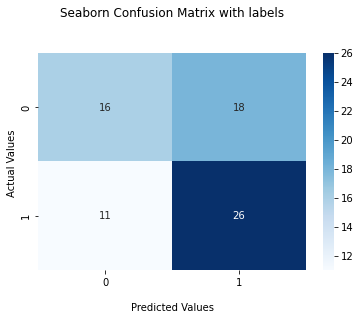

In [173]:
import seaborn as sns
r2 = sklearn.metrics.confusion_matrix(data_test.maslow_basic_advanced, y_predicted)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

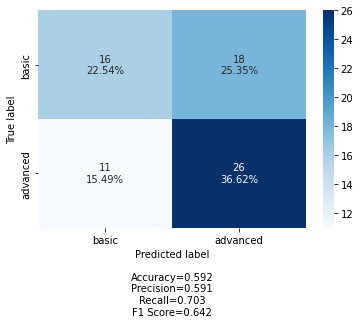

In [174]:
uniqueClassesMaslow = [1,0]
uniqueClassesMaslowLabel = ['basic','advanced']
make_confusion_matrix(r2, group_names=uniqueClassesMaslow, categories=uniqueClassesMaslowLabel, cmap='Blues')

In [175]:
# FEW SHOT LEARNING

In [176]:
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFBertModel 
new_model = tf.keras.models.load_model('/content/drive/MyDrive/My Folders/NLP_Research/bert_base_cased_basic_advanced_classifier.h5',custom_objects={'TFBertModel': TFBertModel})
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 tf_bert_model_12 (TFBertModel)  TFBaseModelOutputWi  108310272  ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, None                                           

In [177]:
data_train = train_data
data_test = test_data
print(data_train.shape)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

(71, 12)


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


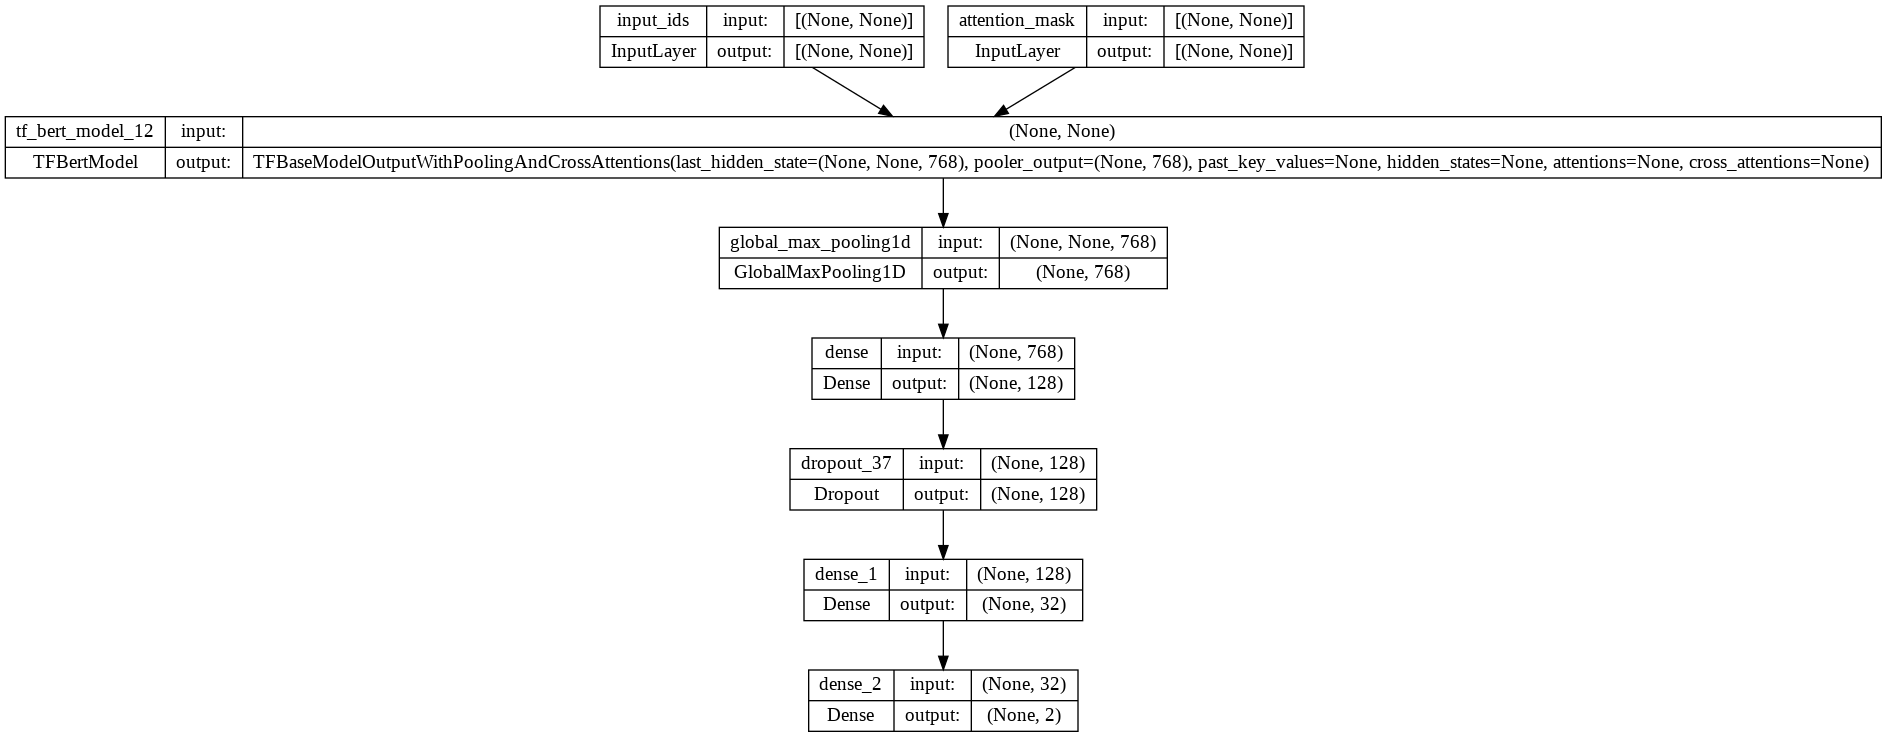

In [197]:
test_model = new_model
test_model.layers
tf.keras.utils.plot_model(test_model, show_shapes = True)

In [198]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)
metric = tf.keras.metrics.BinaryAccuracy()
test_model.compile(optimizer = optimizer, loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = metric)

In [199]:
data_train['maslow_basic_advanced'] = data_train['maslow_basic_advanced'].replace(['basic','advanced'],[1,0])
data_test['maslow_basic_advanced'] = data_test['maslow_basic_advanced'].replace(['basic','advanced'],[1,0])
data_train['maslow_basic_advanced'] = np.asarray(data_train['maslow_basic_advanced']).astype('float32').reshape((-1,1))
data_test['maslow_basic_advanced'] = np.asarray(data_test['maslow_basic_advanced']).astype('float32').reshape((-1,1))
data_train.head()

,Unnamed: 0,unique_id,Title,Text,sentence,Subreddit,number_of_words_in_title_Text,number_of_words_in_text,number_of_words_in_title,reac/nonreac,maslow,maslow_basic_advanced
41,218,124678,"It's 2017, and I need to rant.","To be rather blunt, I'm single, stuck living w...","It's 2017, and I need to rant. To be rather bl...",depression,76.0,69.0,7.0,NaN,belongingness,1.0
42,220,124680,"Fuck genetics, I'm so sick of being ugly",It's such bullshit. Genetics is just this mass...,"Fuck genetics, I'm so sick of being ugly It's ...",depression,95.0,87.0,8.0,NaN,esteem,0.0
43,223,124683,"Is it right when people tell me to ""get over i...",I feel really conflicted right now. Am i just ...,"Is it right when people tell me to ""get over i...",depression,79.0,64.0,15.0,NaN,esteem,0.0
45,233,124693,My (anticlimactic) bucket list.,"Since it's a new year, i wanted to make a list...",My (anticlimactic) bucket list. Since it's a n...,depression,71.0,67.0,4.0,NaN,self actualization,0.0
46,235,124695,Here's to 2016...,Probably the most depressing year of my life. ...,Here's to 2016... Probably the most depressing...,depression,93.0,90.0,3.0,NaN,esteem,0.0


In [200]:
# Model is overfitting too much if included callbacks
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        train_history = test_model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow_basic_advanced),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow_basic_advanced)
                            ),
                            epochs = 2,
                            batch_size = 36,
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/2


2/2 [==============================] - 64s 38s/step - loss: 8.6701e-05 - binary_accuracy: 1.0000 - val_loss: 5.7137 - val_binary_accuracy: 0.5500
Epoch 2/2
2/2 [==============================] - 1s 673ms/step - loss: 8.4431e-05 - binary_accuracy: 1.0000 - val_loss: 5.7216 - val_binary_accuracy: 0.5000
Do you want to run another epoch?1/0: 1
Epoch 1/2
2/2 [==============================] - 1s 700ms/step - loss: 3.4237e-05 - binary_accuracy: 1.0000 - val_loss: 2.9180 - val_binary_accuracy: 0.7500
Epoch 2/2
2/2 [==============================] - 1s 693ms/step - loss: 0.0517 - binary_accuracy: 0.9859 - val_loss: 3.5916 - val_binary_accuracy: 0.7000
Do you want to run another epoch?1/0: 0


In [201]:
test_model.load_weights(checkpoint_filepath)

In [202]:
predicted_raw = test_model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

1/1 [==============================] - 3s 3s/step


array([9.635944e-09, 9.999994e-01], dtype=float32)

In [203]:
y_predicted = np.argmax(predicted_raw, axis = 1)

In [204]:
from sklearn.metrics import classification_report 
t = ['advanced_needs', 'basic_needs']
print(classification_report(data_test.maslow_basic_advanced, y_predicted,target_names = t))

                precision    recall  f1-score   support

advanced_needs       0.29      0.40      0.33         5
   basic_needs       0.77      0.67      0.71        15

      accuracy                           0.60        20
     macro avg       0.53      0.53      0.52        20
  weighted avg       0.65      0.60      0.62        20



[[ 2  3]
 [ 5 10]]


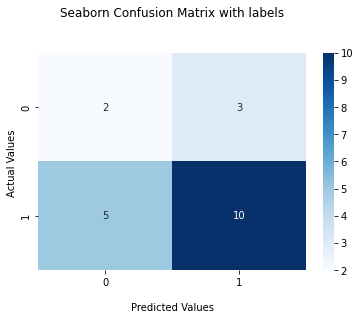

In [207]:
import seaborn as sns
r2 = sklearn.metrics.confusion_matrix(data_test.maslow_basic_advanced, y_predicted)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

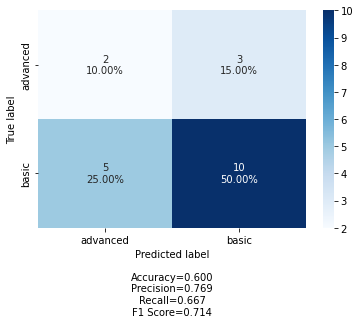

In [214]:
uniqueClassesMaslow = [0,1]
uniqueClassesMaslowLabel = ['advanced','basic']
make_confusion_matrix(r2, group_names=uniqueClassesMaslow, categories=uniqueClassesMaslowLabel, cmap='Blues')

In [215]:
data_test['predicafterfewshot'] = y_predicted

In [216]:
data_test.shape[0]

20

In [217]:
anish = data_test.copy()
anish['predicafterfewshot'] = y_predicted

In [227]:
anish.to_csv('Prediction_on_test_data_after_fewshotsimulation.csv')